In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
# Features (X) and target variable (y)
X = df.drop('medv', axis=1)  # All columns except 'medv'
y = df['medv']  # Target variable 'medv' (median home price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

model = LinearRegression() # Initialize the model


model.fit(X_train, y_train) # Train the model on the training data

LinearRegression()

In [6]:
y_pred = model.predict(X_test) # Predict on the test set

In [7]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R²): 0.67


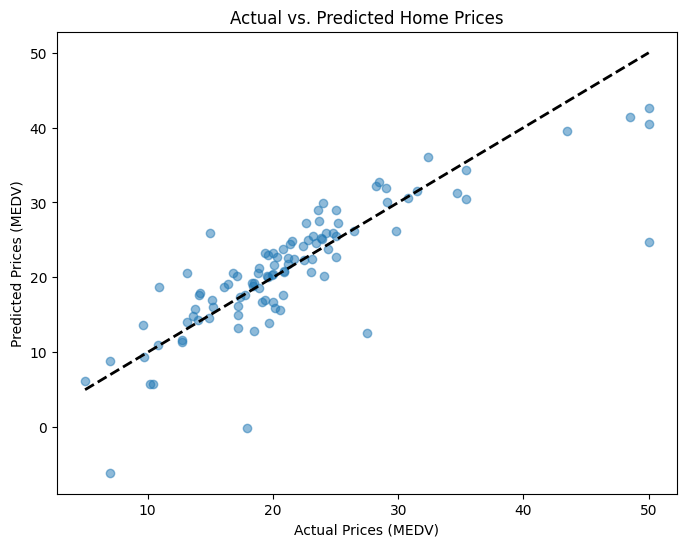

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Actual vs. Predicted Home Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()

In [9]:

coefficients = pd.DataFrame({       # Display coefficients and intercept
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print(f"\nIntercept: {model.intercept_:.2f}")

    Feature  Coefficient
0      crim    -0.113056
1        zn     0.030110
2     indus     0.040381
3      chas     2.784438
4       nox   -17.202633
5        rm     4.438835
6       age    -0.006296
7       dis    -1.447865
8       rad     0.262430
9       tax    -0.010647
10  ptratio    -0.915456
11        b     0.012351
12    lstat    -0.508571

Intercept: 30.25
